> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This project looks into the TMDB Dataset. In this project, I analyze the dataset to explore trends and relationships within the film industry. The dataset includes information such as budget, revenue, popularity, genres, release dates, and user ratings.
The goal of this analysis is to investigate how different factors relate to a movie’s financial success and audience reception. Using Python, NumPy, and Pandas, the data is cleaned and transformed to ensure accuracy before performing exploratory data analysis and visualizations.

Through this investigation, I aim to identify patterns in movie performance over time and determine which characteristics are associated with higher revenue, popularity, and rat

### Question(s) for Analysis

**Question 1: What factors influence movie revenue?**
- a) How is movie revenue distibuted
- b) Does Budget affect the revenue?
- c) Does the genre of the movie affect the revenue?

**Question 2: How movie trends change over time?**
- a) Number of movies released per year
- b) Popularity of Movies per Year
- C) Revenue Per Year

**Question 3: How do certain genres receive higher average ratings??**

In [134]:
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


This is a function to create the future plots in the notebook

In [135]:
def set_plot_labels(fig, title, xlabel, ylabel): 
    fig.set_title(title) 
    fig.set_xlabel(xlabel) 
    fig.set_ylabel(ylabel)

In [136]:
def create_plot(plot_type, data, x_col=None, y_col=None,
                bins=50, title="", xlabel="", ylabel=""):
    
    fig, ax = plt.subplots()
    
    if plot_type == "hist":
        ax.hist(data[x_col], bins=bins)
        
    elif plot_type == "scatter":
        ax.scatter(data[x_col], data[y_col])
        
    elif plot_type == "line":
        ax.plot(data[x_col], data[y_col])
        
    elif plot_type == "bar":
        ax.bar(data[x_col], data[y_col])
        
    elif plot_type == "barh":
        ax.barh(data[y_col], data[x_col])
    
    set_plot_labels(ax, title, xlabel, ylabel)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling
### General Properties

First of all I loaded the Dataset and checked the fist few rows to see how the dataset works

In [137]:
df=pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [139]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Second I looked at the datasets properties to figure out the layout
Checked the datasets shape, info, descreption, null values and if there are any duplicates

In [140]:
df.shape

(10866, 21)

In [141]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [142]:
df.duplicated().sum()

1


#Step 1: Remove rows with missing values in the 'imdb_id','cast','director','overview','genres' column


In [143]:
df = df.dropna(subset=['imdb_id','cast','director','overview','genres'])
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
homepage                7834
director                   0
tagline                 2725
keywords                1422
overview                   0
runtime                    0
genres                     0
production_companies     954
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Step 2:drop homepage column,tagline since it has 3000+ missing values


In [144]:
df = df.drop('homepage', axis=1)
df = df.drop('tagline', axis=1)
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       0
director                   0
keywords                1422
overview                   0
runtime                    0
genres                     0
production_companies     954
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Step 3:Fill in any missing values in the 'keywords' and 'production_companies' column with an a sample stirng


In [145]:
df['keywords'] = df['keywords'].fillna('No Keywords')
df['production_companies'] = df['production_companies'].fillna('Unknown')
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

Step 4: Remove duplicate rows


In [146]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Step 5: Change release_date to datetime 

In [147]:
df["release_date"] = pd.to_datetime(
    df["release_date"],
    format="%m/%d/%y",
    errors="coerce"
)

mask = df["release_date"].dt.year > 2016

df.loc[mask, "release_date"] = df.loc[mask, "release_date"] - pd.DateOffset(years=100)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10724 entries, 0 to 10865
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10724 non-null  int64         
 1   imdb_id               10724 non-null  object        
 2   popularity            10724 non-null  float64       
 3   budget                10724 non-null  int64         
 4   revenue               10724 non-null  int64         
 5   original_title        10724 non-null  object        
 6   cast                  10724 non-null  object        
 7   director              10724 non-null  object        
 8   keywords              10724 non-null  object        
 9   overview              10724 non-null  object        
 10  runtime               10724 non-null  int64         
 11  genres                10724 non-null  object        
 12  production_companies  10724 non-null  object        
 13  release_date         

#change genre,cast,production_companies column to list

In [148]:
df['genres'] = df['genres'].str.split('|')
df['cast'] = df['cast'].str.split('|')
df['production_companies'] = df['production_companies'].str.split('|')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What factors influence movie revenue?)

First of all i created a subset for financial data because there are a lot of values of budget and revenue that are set to 0

In [149]:
df_financial = df[(df["budget"] > 0) & (df["revenue"] > 0)].copy()


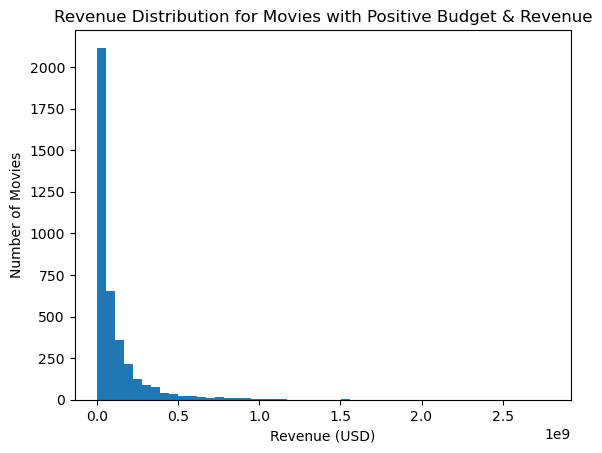

In [150]:
create_plot(
    "hist",
    df_financial,
    x_col="revenue",
    bins=50,
    title="Revenue Distribution for Movies with Positive Budget & Revenue",
    xlabel="Revenue (USD)",
    ylabel="Number of Movies"
)

Here I try to find if there is a correlation between revenue and budget

In [151]:
df_financial["budget"].corr(df_financial["revenue"])

0.6884031904522714

Then i drew a plot to demonstrate the relationship between budget and revenue

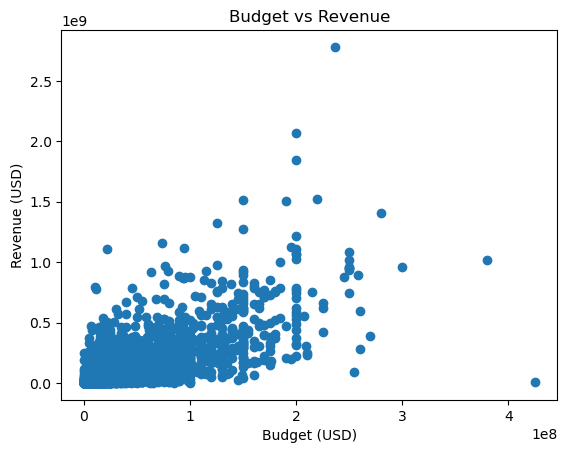

In [152]:
create_plot("scatter", df_financial, x_col="budget", y_col="revenue", title="Budget vs Revenue", xlabel="Budget (USD)", ylabel="Revenue (USD)")

After i looked into the relationship between genres and revenue, and I drew a plot to demonstrate it

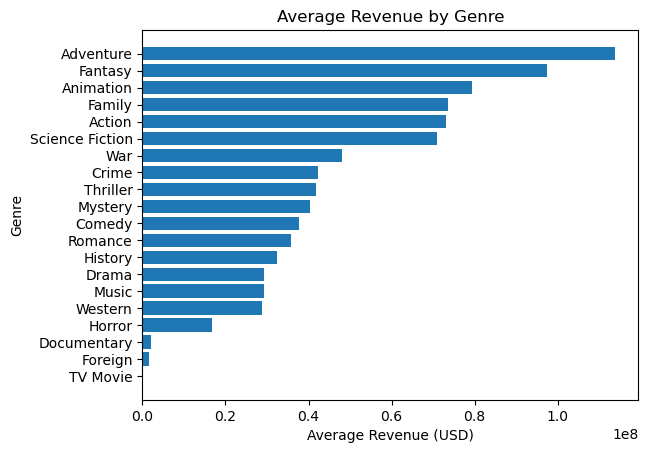

In [153]:
df_genres = df.explode("genres")

create_plot("barh", df_genres.groupby("genres")["revenue"].mean().sort_values().reset_index(), x_col="revenue", y_col="genres", title="Average Revenue by Genre", xlabel="Average Revenue (USD)", ylabel="Genre")

After that I wanted to check the total movie profits 

In [161]:
revenue = df_financial["revenue"].to_numpy()
budget= df_financial["budget"].to_numpy()

profit = revenue - budget

df_financial["profit"] = profit

profit_mean = np.mean(profit)
profit_median = np.median(profit)
profit_q25, profit_q75 = np.percentile(profit, [25, 75])

print("Profit Statistics")
print(f"Mean Profit: {profit_mean:,.0f} USD")
print(f"Median Profit: {profit_median:,.0f} USD")
print(f"25th Percentile: {profit_q25:,.0f} USD")
print(f"75th Percentile: {profit_q75:,.0f} USD")

profitable_movies = np.where(profit > 0, 1, 0)

percentage_profitable = np.mean(profitable_movies) * 100

print(f"Percentage of Profitable Movies: {percentage_profitable:.2f}%")

Profit Statistics
Mean Profit: 70,565,952 USD
Median Profit: 20,144,499 USD
25th Percentile: -1,312,284 USD
75th Percentile: 81,980,662 USD
Percentage of Profitable Movies: 72.12%


Now I want to draw a plot to look into the profit distrubution throughout the years

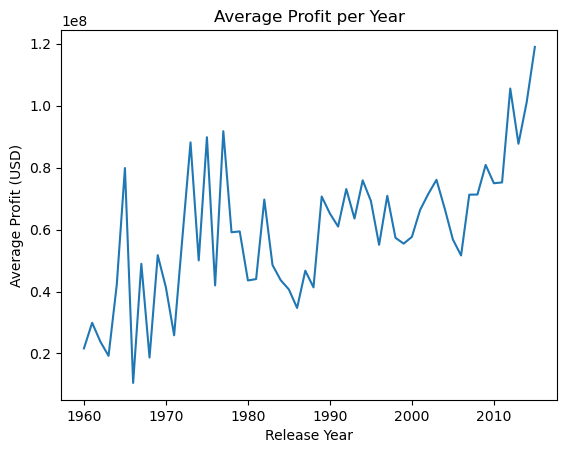

In [155]:
profit_per_year = (
    df_financial
    .groupby("release_year")["profit"]
    .mean()
    .reset_index()
)
create_plot("line", profit_per_year, x_col="release_year", y_col="profit", title="Average Profit per Year", xlabel="Release Year", ylabel="Average Profit (USD)")

### Research Question 2  (How have movie trends changed over time?)

First of all I looked into the number fo movies released per year and see if the number increased

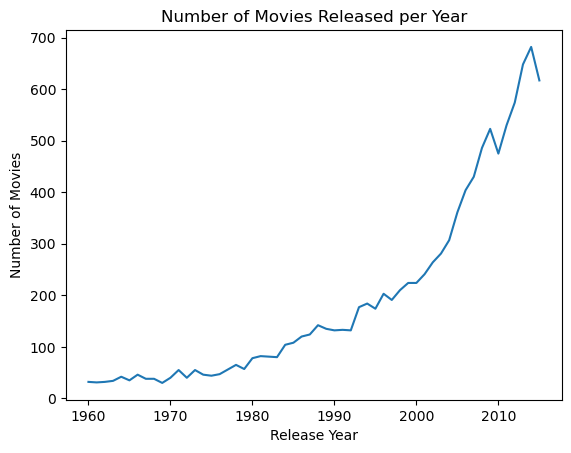

In [156]:
create_plot(
    "line",
    df["release_year"].value_counts().sort_index().reset_index(name="count"),
    x_col="release_year",
    y_col="count",
    title="Number of Movies Released per Year",
    xlabel="Release Year",
    ylabel="Number of Movies"
)

Then I looked into how popularity changes over the years

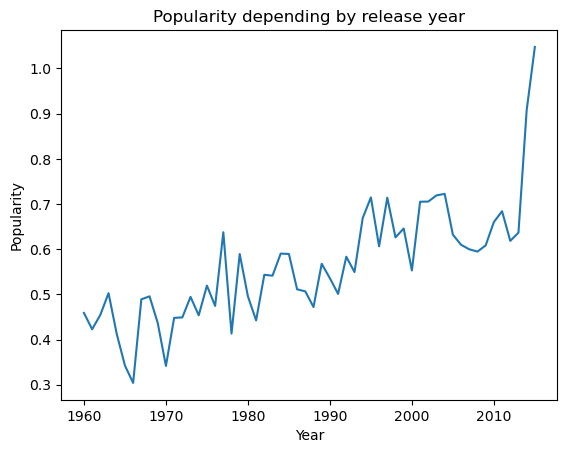

In [157]:
create_plot(
    "line",
    df.groupby("release_year")["popularity"].mean().reset_index(),
    x_col="release_year",
    y_col="popularity",
    title="Popularity depending by release year",
    xlabel="Year",
    ylabel="Popularity"
)

Last I looked how revenue changed over the years

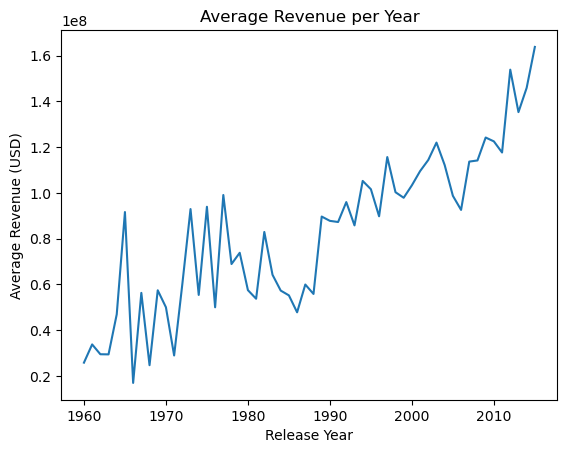

In [158]:
create_plot(
    "line",
    df_financial.groupby("release_year")["revenue"].mean().reset_index(),
    x_col="release_year",
    y_col="revenue",
    title="Average Revenue per Year",
    xlabel="Release Year",
    ylabel="Average Revenue (USD)"
)

### Research Question 3 (Do certain genres receive higher average ratings?)

Here I looked how genres are with highest rating 

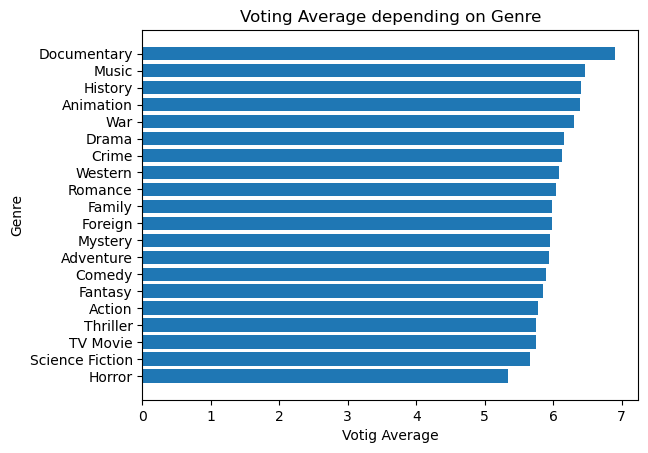

In [159]:
create_plot(
    "barh",
    df_genres.groupby("genres")["vote_average"].mean().sort_values().reset_index(),
    x_col="vote_average",
    y_col="genres",
    title="Voting Average depending on Genre",
    xlabel="Votig Average",
    ylabel="Genre"
)

<a id='conclusions'></a>
## Conclusions

* Budget and Revenue Relationship: Movies with higher budgets generally generated higher revenues, indicating a positive correlation between production investment and box office performance. However, this relationship does not imply causation.

* Revenue Distribution: Movie revenues are highly skewed, with a small number of films earning exceptionally high amounts while most films generate moderate or lower revenues.

* Profit Trends Over Time: The analysis of movie profit (revenue minus budget) shows that average profit varies across release years. While some years demonstrate strong profitability, others reflect lower or more moderate returns, indicating fluctuations in financial performance over time.


* Revenue Per Genre: Adventure Movies has the highes average revenue for all the movie genres

* Industry Growth Over Time: The number of movie releases increased steadily over the years, also the popularity and revenue has also increased over the years,reflecting the expansion and growing competitiveness of the film industry.

* Genre and Ratings: Certain genres tend to receive higher average ratings than others, suggesting differences in audience reception across genres.

* Limitations of the Analysis:
    * Some financial data (budget/revenue) may be missing or inaccurate.
    * Outliers may influence overall trends.
    * No formal statistical tests were performed, so conclusions are based on observed patterns rather than statistical significance.

* Future Improvements:
    * Adjust mov
    * Get more accurate data for revenue and budget becuase the data is missing
    * Explore deeper genre segmentation or additional variables .
    * Incorporate updated or more recent data to enhance the dataset’s relevance.

In [160]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 704153 bytes to Investigate_a_Dataset.html
